## **Util**

In [50]:
import matplotlib.pyplot as plt
import numpy as np


class util(object):
    @staticmethod
    def add_intercept(x):
        """Add intercept to matrix x.

        Args:
            x: 2D NumPy array.

        Returns:
            New matrix same as x with 1's in the 0th column.
        """
        new_x = np.zeros((x.shape[0], x.shape[1] + 1), dtype=x.dtype)
        new_x[:, 0] = 1
        new_x[:, 1:] = x
        return new_x

    @staticmethod
    def load_dataset(csv_path, label_col='y', add_intercept=False):
        """Load dataset from a CSV file.

        Args:
            csv_path: Path to CSV file containing dataset.
            label_col: Name of column to use as labels (should be 'y' or 't').
            add_intercept: Add an intercept entry to x-values.

        Returns:
            xs: Numpy array of x-values (inputs).
            ys: Numpy array of y-values (labels).
        """
        # Validate label_col argument
        allowed_label_cols = ('y', 't')
        if label_col not in allowed_label_cols:
            raise ValueError(
                f'Invalid label_col: {label_col} (expected one of {allowed_label_cols})'
            )

        # Load headers
        with open(csv_path, 'r') as csv_fh:
            headers = csv_fh.readline().strip().split(',')

        # Load features and labels
        x_cols = [i for i in range(len(headers)) if headers[i].startswith('x')]
        l_cols = [i for i in range(len(headers)) if headers[i] == label_col]
        inputs = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=x_cols)
        labels = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=l_cols)

        if inputs.ndim == 1:
            inputs = np.expand_dims(inputs, -1)

        if add_intercept:
            inputs = util.add_intercept(inputs)

        return inputs, labels

    @staticmethod
    def plot(x, y, theta, save_path=None, correction=1.0):
        """Plot dataset and fitted logistic regression parameters.

        Args:
            x: Matrix of training examples, one per row.
            y: Vector of labels in {0, 1}.
            theta: Vector of parameters for logistic regression model.
            save_path: Path to save the plot.
            correction: Correction factor to apply (Problem 2(e) only).
        """
        # Plot dataset
        plt.figure()
        plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
        plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

        # Plot decision boundary (found by solving for theta^T x = 0)
        margin1 = (max(x[:, -2]) - min(x[:, -2])) * 0.2
        margin2 = (max(x[:, -1]) - min(x[:, -1])) * 0.2
        x1 = np.arange(min(x[:, -2]) - margin1, max(x[:, -2]) + margin1, 0.01)
        x2 = -(theta[0] / theta[2] * correction + theta[1] / theta[2] * x1)
        plt.plot(x1, x2, c='red', linewidth=2)
        plt.xlim(x[:, -2].min() - margin1, x[:, -2].max() + margin1)
        plt.ylim(x[:, -1].min() - margin2, x[:, -1].max() + margin2)

        # Add labels and save to disk
        plt.xlabel('x1')
        plt.ylabel('x2')
        if save_path is not None:
            plt.savefig(save_path)
        plt.show()


# **Logistic Regression**

---

## **Loss (Cost) Function**

$$
J(\boldsymbol{\theta}) = 
- \frac{1}{m} \sum_{i=1}^{m} 
\Big[ 
y^{(i)} \log\big(h_{\boldsymbol{\theta}}(\mathbf{x}^{(i)})\big) 
+ \big(1 - y^{(i)}\big) \log\big(1 - h_{\boldsymbol{\theta}}(\mathbf{x}^{(i)})\big)
\Big]
$$

---

## **Hypothesis Function**

$$
h_{\boldsymbol{\theta}}(\mathbf{x}^{(i)}) 
= \sigma\big(\boldsymbol{\theta}^\top \mathbf{x}^{(i)}\big)
$$

where the **sigmoid function** is:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

---

## **Notation Summary**

| Symbol | Meaning |
|:--:|:--|
| $m$ | number of training examples |
| $\mathbf{x}^{(i)}$ | input feature vector of the $i^{th}$ example |
| $y^{(i)} \in \{0, 1\}$ | true label for the $i^{th}$ example |
| $\boldsymbol{\theta}$ | parameter (weight) vector |
| $h_{\boldsymbol{\theta}}(x)$ | predicted probability that $y=1$ |
| $\sigma(z)$ | sigmoid activation function |

---

💡 *Goal:* Find parameters $\boldsymbol{\theta}$ that minimize the cost function $J(\boldsymbol{\theta})$, i.e.  
$$
\boldsymbol{\theta}^* = \arg\min_{\boldsymbol{\theta}} J(\boldsymbol{\theta})
$$


In [51]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [56]:
class LinearModel(object):
    """Base class for linear models"""
    def __init__(self, step_size=0.01, max_iter=100, eps=-1e6,
                theta_0=None, verbose=True):
        
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
        self.theta_0 = theta_0
        self.verbose = verbose
    def fit(X, y):
        """Run solver so fit linear model.
        
        Args:
            X: Training example inputs. Shape (m, n)
            y: Training example labels. Shape (m, )
        """

        raise NotImplementedError("Subclass of LinearModel must implement fit method.")

    def predict(self, X):

        """Make a pediction given new inputs x
        Args:
            X: Input of shape(m, n)
        
        Returns:
            Output of shape(m, )"""

        raise NotImplemetedError("Subclass of LinearModel must implement predict method.")

# **1. Bacth Gradient Descent Logistic Regression**

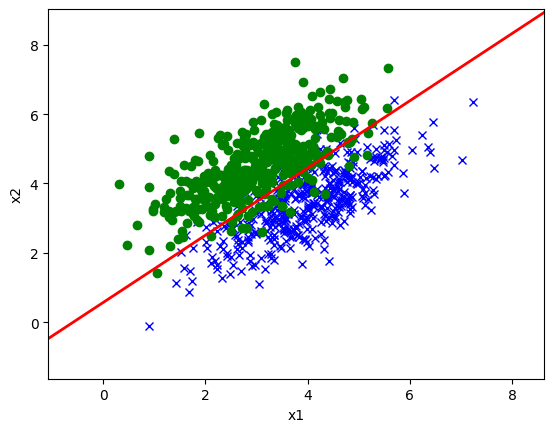

In [57]:
class BatchGradientDescentLogisticRegression(LinearModel):

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)

        while True:
            theta_old = np.copy(self.theta)
            h = sigmoid(X @ self.theta)
            gradient = X.T @ (h - y) / m             
            self.theta -= self.step_size * gradient     
            
            if np.linalg.norm(self.theta - theta_old, ord=1) < self.eps:
                break

    def predict(self, X):
        return sigmoid(X @ self.theta)

def run(train_path, eval_path, pred_path):
    X_train, y_train = util.load_dataset(train_path, add_intercept=True)

    model = BatchGradientDescentLogisticRegression(eps=1e-5)
    model.fit(X_train, y_train)

    # Plot data and decision boundary
    util.plot(X_train, y_train, model.theta, 'Output/BatchGradientDescentLogisticRegression.png')

    # Save predict
    X_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)
    y_pred = model.predict(X_eval)
    np.savetxt(pred_path, y_pred > 0.5, fmt='%d')

if __name__ == "__main__":
    run(train_path="Data/train.csv", eval_path="Data/test.csv", pred_path="Output/BatchGradientDescentLogisticRegression.txt")

# **2. Stochatic Gradient Descent Logistic Regression**

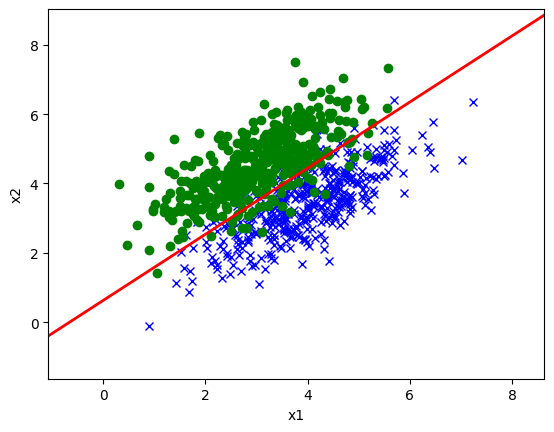

In [58]:
class StochaticGradientDescentLogisticRegression(LinearModel):

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)

        for epoch in range(self.max_iter):
            indices = np.random.permutation(m)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            theta_old = np.copy(self.theta)

            for i in range(m):
                xi = X_shuffled[i].reshape(-1, 1)
                yi = y_shuffled[i]
                hi = float(xi.T @ self.theta)     
                gradient = (hi - yi) * xi          
                self.theta -= self.step_size * gradient

            if np.linalg.norm(self.theta - theta_old, ord=1) < self.eps:
                break

    def predict(self, X):
        return sigmoid(X @ self.theta)

def run(train_path, eval_path, pred_path):
    X_train, y_train = util.load_dataset(train_path, add_intercept=True)

    model = NewtonMethodLogisticRegression(eps=1e-5)
    model.fit(X_train, y_train)

    # Plot data and decision boundary
    util.plot(X_train, y_train, model.theta, 'Output/StochaticGradientDescentLogisticRegression.png')

    # Save predict
    X_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)
    y_pred = model.predict(X_eval)
    np.savetxt(pred_path, y_pred > 0.5, fmt='%d')

if __name__ == "__main__":
    run(train_path="Data/train.csv", eval_path="Data/test.csv", pred_path="Output/StochaticGradientDescentLogisticRegression.txt")

# **3. Newton's Method Logistic Regression**

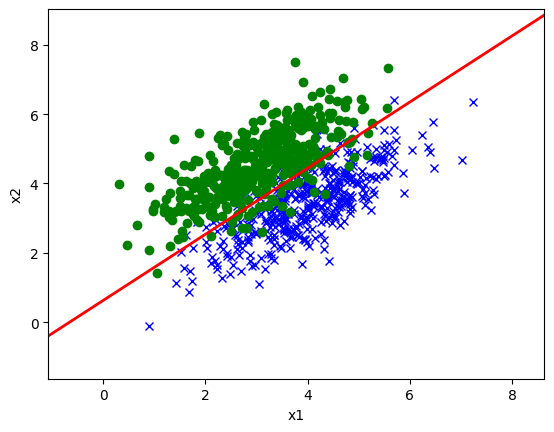

In [60]:
class NewtonMethodLogisticRegression(LinearModel):

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)

        m, n = X.shape
        self.theta = np.zeros(n)

        # Newton's method
        while True:
            theta_old = np.copy(self.theta)
            # Compute the derivative of the log-likelihood
            h = sigmoid(X @ self.theta)
            gradient_l = X.T @ (y - h) / m

            # Compute the Hessian matrix
            H = (X.T * (h * (1 - h) )) @ X / m

            self.theta += np.linalg.inv(H) @ gradient_l

            if np.linalg.norm(self.theta - theta_old) < self.eps:
                break
    def predict(self, X):
        return sigmoid(X @ self.theta)

def run(train_path, eval_path, pred_path):
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)

    model = NewtonMethodLogisticRegression(eps=1e-5)
    model.fit(x_train, y_train)

    # Plot data and decision boundary
    util.plot(x_train, y_train, model.theta, 'Output/NewtonMethodLogisticRegression.png')

    # Save predict
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)
    y_pred = model.predict(x_eval)
    np.savetxt(pred_path, y_pred > 0.5, fmt='%d')

if __name__ == "__main__":
    run(train_path="Data/train.csv", eval_path="Data/test.csv", pred_path="Output/NewtonMethodLogisticRegression.txt")

